## Import and Explore the Data

In [1]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from datetime import datetime
from scipy.stats import zscore

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import pickle
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import binarize

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection  import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# To visualise Decision Trees
from sklearn.tree import export_graphviz
from os import system
from IPython.display import Image


# To see multiple outputs together

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [2]:
# Import data and check head

df = pd.read_csv('signal-data.csv')

df.head()

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,NaN,NaN,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,NaN,NaN,NaN,NaN,0.9460,0.0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123.0,111.3,75.2,46.2000,350.6710,0.3948,0.0,6.78,0.0034,0.0898,0.0850,0.0358,0.0328,12.2566,0.0,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,NaN,NaN,1017.0,967.0,1066.0,368.0,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,0.0,0.0,20.95,0.333,12.49,16.713,0.0803,5.72,0.0,11.19,65.363,0.0,0.0,0.0,0.0,0.0,0.0,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.040,16.230,0.2951,8.64,0.0,10.30,97.314,0.0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.0010,NaN,0.0707,0.0211,175.2173,0.0315,1940.3994,0.0,0.0744,0.0546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0027,0.0040,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0188,0.0,219.9453,0.0011,2.8374,0.0189,0.0050,0.4269,0.0,0.0,0.0,0.0,0.0,0.

In [3]:
# Shape of data

print("The data has {} rows / observations and {} columns / features".format(df.shape[0],df.shape[1]))
print()
print('The size of the data is:', df.size)

The data has 1567 rows / observations and 592 columns / features

The size of the data is: 927664


In [4]:
# Rename variables with a prefix for convenience

df.columns = 'var_' + df.columns

df.rename(columns = {'var_Time':'Time'}, inplace = True) 
df.rename(columns = {'var_Pass/Fail':'Pass_Fail'}, inplace = True)

## Data Cleansing

We will study the numeric features (the predictors) separately and hence will sepaarte out those features. First we check the data types of each variable.

In [5]:
# Checking the data types of the varaibles

df.dtypes

Time          object
var_0        float64
var_1        float64
var_2        float64
var_3        float64
var_4        float64
var_5        float64
var_6        float64
var_7        float64
var_8        float64
var_9        float64
var_10       float64
var_11       float64
var_12       float64
var_13       float64
var_14       float64
var_15       float64
var_16       float64
var_17       float64
var_18       float64
var_19       float64
var_20       float64
var_21       float64
var_22       float64
var_23       float64
var_24       float64
var_25       float64
var_26       float64
var_27       float64
var_28       float64
var_29       float64
var_30       float64
var_31       float64
var_32       float64
var_33       float64
var_34       float64
var_35       float64
var_36       float64
var_37       float64
var_38       float64
var_39       float64
var_40       float64
var_41       float64
var_42       float64
var_43       float64
var_44       float64
var_45       float64
var_46       

* The data types is fine as all are float types and from the project description we know that all features are numeric.

In [6]:
# Identify duplicates records in the data

dupes = df.duplicated()
if sum(dupes) == 0:
    print("There is no duplicates in the data")
else:
    df = df.drop_duplicates()
    dupes_check = df.duplicated()
    sum(dupes_check)

There is no duplicates in the data


In [7]:
df1=df.copy()

# Creating data with Time and the Target variable and dropping those two from the rest of the data

df2=df1[['Time','Pass_Fail']]
df1 = df1.drop(['Time','Pass_Fail'], axis=1)

#### Missing / Incorrect Value Treatment

In [8]:
# 5 point summary to check incorrect values

df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
var_0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.49000,3056.650000,3356.3500
var_1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.40500,2538.822500,2846.4400
var_2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.06670,2218.055500,2315.2667
var_3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.21440,1591.223500,3715.0417
var_4,1553.0,4.197013,56.355540,0.6815,1.017700,1.31680,1.525700,1114.5366
var_5,1553.0,100.000000,0.000000,100.0000,100.000000,100.00000,100.000000,100.0000
var_6,1553.0,101.112908,6.237214,82.1311,97.920000,101.51220,104.586700,129.2522
var_7,1558.0,0.121822,0.008961,0.0000,0.121100,0.12240,0.123800,0.1286
var_8,1565.0,1.462862,0.073897,1.1910,1.411200,1.46160,1.516900,1.6564
var_9,1565.0,-0.000841,0.015116,-0.0534,-0.010800,-0.00130,0.008400,0.0749


* There are missing values as count for most variables are less than 1567 (which is the original row numbers).
* Some variables has 0 or close to 0 standard deviation - this means the values across rows are similar (Example var_5, var_13 etc)
* Some variables have negative values (example var_9). Howvever, these may be correct since we do not have the right domain knowledge. Hence, no changes will be made.
* There are presence of outliers (example var_4) where max value is much higher than 75th percentile.

#### Missing Value Treatment

In [9]:
# Drop columns with more than 30% missing values

dropcols = df1.columns[df1.isna().mean() >= 0.30]
df1 = df1.drop(dropcols, axis=1)


In [10]:
print("The data now has {} rows / observations and {} columns / features".format(df1.shape[0],df1.shape[1]))

The data now has 1567 rows / observations and 558 columns / features


* Thus, we have dropped 32 variables which had more than 30% missing values.

In [11]:
# Fill remaining missing values with median
    
for column in df1.columns:
    df1[column] = df1[column].fillna(df1[column].median())
    

df1.isnull().any().any()

False

In [12]:
# Retaining columns which have variance greater than 0.1

selector = VarianceThreshold(threshold=(0.1))
selector.fit_transform(df1)

df1=df1[df1.columns[selector.get_support(indices=True)]]

array([[3.0309300e+03, 2.5640000e+03, 2.1877333e+03, ..., 1.4950900e+01,
        2.3630000e+00, 7.1900500e+01],
       [3.0957800e+03, 2.4651400e+03, 2.2304222e+03, ..., 1.0900300e+01,
        4.4447000e+00, 2.0820450e+02],
       [2.9326100e+03, 2.5599400e+03, 2.1864111e+03, ..., 9.2721000e+00,
        3.1745000e+00, 8.2860200e+01],
       ...,
       [2.9788100e+03, 2.3797800e+03, 2.2063000e+03, ..., 1.7726700e+01,
        3.0590000e+00, 4.3523100e+01],
       [2.8949200e+03, 2.5320100e+03, 2.1770333e+03, ..., 1.9210400e+01,
        3.5662000e+00, 9.3494100e+01],
       [2.9449200e+03, 2.4507600e+03, 2.1954444e+03, ..., 2.2918300e+01,
        3.6275000e+00, 1.3778440e+02]])

In [16]:
# Verifying above step and checking the number of features

print("The data now has {} rows / observations and {} columns / features".format(df1.shape[0],df1.shape[1]))

df1.var()

The data now has 1567 rows / observations and 254 columns / features


var_0      5.399434e+03
var_1      6.436555e+03
var_2      8.632416e+02
var_3      1.934569e+05
var_4      3.147628e+03
var_6      3.855646e+01
var_12     1.059652e+01
var_14     7.805967e+00
var_15     2.959994e+02
var_16     5.767511e+00
var_18     7.719652e+00
var_21     3.924158e+05
var_22     8.720946e+04
var_23     1.902415e+06
var_24     8.414911e+06
var_27     1.546679e+00
var_28     1.196462e+01
var_29     1.668178e-01
var_31     2.862783e-01
var_32     4.104305e+00
var_33     1.806432e+00
var_34     1.397715e+00
var_35     6.625194e+00
var_36     1.397716e+00
var_38     1.994633e-01
var_39     3.264012e+00
var_40     5.717788e+02
var_41     5.487393e+00
var_43     3.884885e+01
var_45     6.157142e+01
var_46     1.480220e+02
var_48     2.045578e+01
var_50     7.467127e+01
var_51     3.709927e+03
var_55     6.613458e+02
var_59     9.047509e+01
var_60     3.620329e+01
var_62     7.417505e+01
var_63     5.046832e+01
var_64     2.466564e+01
var_65     5.049531e+01
var_66     1.345

In [13]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
var_0,1567.0,3014.441551,73.480841,2743.2400,2966.66500,3011.49000,3056.54000,3356.3500
var_1,1567.0,2495.866110,80.228143,2158.7500,2452.88500,2499.40500,2538.74500,2846.4400
var_2,1567.0,2200.551958,29.380973,2060.6600,2181.09995,2201.06670,2218.05550,2315.2667
var_3,1567.0,1395.383474,439.837330,0.0000,1083.88580,1285.21440,1590.16990,3715.0417
var_4,1567.0,4.171281,56.103721,0.6815,1.01770,1.31680,1.51880,1114.5366
var_6,1567.0,101.116476,6.209385,82.1311,97.93780,101.51220,104.53000,129.2522
var_12,1567.0,199.956272,3.255230,182.0940,198.13095,199.53560,202.00675,272.0451
var_14,1567.0,9.005297,2.793916,2.2493,7.09675,8.96700,10.85870,19.5465
var_15,1567.0,413.084376,17.204633,333.4486,406.13100,412.21910,419.08280,824.9271
var_16,1567.0,9.907496,2.401564,4.4696,9.56855,9.85175,10.12775,102.8677


* Thus, we have removed 304 variables which had almost zero variance.

#### Outlier Treatment

In [14]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

In [15]:
# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(df1 < Q1 - 1.5 * IQR)[0], np.where(df1 < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    df1.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(df1 > Q3 + 1.5 * IQR)[0], np.where(df1 > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    df1.iloc[i,j] = whisker[j]
    

## Data Analysis and Visualisation

First we check for any missing values in the Time or the target variable.

In [16]:
df2.isnull().any().any()

False

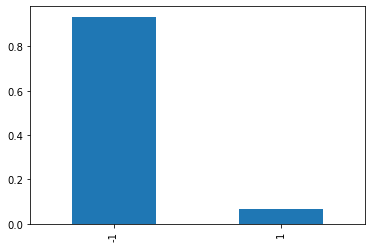

In [17]:
# Frequency of the target variable

df2['Pass_Fail'].value_counts(normalize=True).plot(kind="bar");

* More than 90% is a pass and around 10% is a fail.

Before proceeding with any further visusalisation or analysis we will first look for multi-collinearity in data and drop variables with higher correlation (both positive and negative).

Since the no of variables is high we will show the correlations in an excel file (and not as a heat map here).

In [18]:
# Checking the correlation and exporting the information to excel

corr=df1.corr()
corr.to_excel('Predictor corr.xls')

From the Excel file (Predictor corr) we see that for some variables the correlation with other variables is blank. This means that the variability of those variables is low and we will remove them manually.

In [19]:
df1.drop(['var_209','var_347','var_478','var_521'],axis=1, inplace=True)

In [20]:
print("The data now has {} rows / observations and {} columns / features".format(df1.shape[0],df1.shape[1]))

The data now has 1567 rows / observations and 250 columns / features


Now, we proceed to remove the high correlated values

In [21]:
# Checking the correlation and exporting the information to excel

corr=df1.corr()
corr.to_excel('Predictor corr new version.xls')

The next task is to remove variables with high correlation. We set the threshold at 0.70.

In [22]:
#Function to remove the highly collinear features from results dataframe

def remove_collinear_features(x, threshold):
    '''

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [23]:
# Dropping variables with high correlation

df1 = remove_collinear_features(df1,0.70)

var_18 | var_12 | 0.97
var_31 | var_21 | 0.72
var_36 | var_34 | 1.0
var_46 | var_45 | 0.81
var_50 | var_46 | 0.9
var_60 | var_43 | 0.91
var_60 | var_50 | 0.72
var_62 | var_45 | 0.78
var_65 | var_64 | 0.94
var_66 | var_46 | 0.86
var_66 | var_50 | 0.79
var_66 | var_62 | 0.75
var_70 | var_46 | 0.83
var_70 | var_50 | 0.8
var_70 | var_62 | 0.73
var_70 | var_66 | 0.93
var_154 | var_148 | 0.98
var_187 | var_183 | 0.77
var_201 | var_196 | 0.97
var_202 | var_196 | 0.89
var_202 | var_201 | 0.87
var_203 | var_183 | 0.75
var_207 | var_203 | 0.72
var_250 | var_225 | 0.87
var_270 | var_135 | 0.91
var_271 | var_136 | 0.97
var_272 | var_137 | 0.98
var_272 | var_271 | 0.71
var_273 | var_138 | 0.9
var_274 | var_139 | 0.98
var_275 | var_140 | 0.99
var_277 | var_142 | 0.95
var_283 | var_148 | 0.97
var_283 | var_154 | 0.96
var_285 | var_150 | 0.97
var_286 | var_151 | 0.97
var_287 | var_152 | 0.99
var_289 | var_148 | 0.96
var_289 | var_154 | 0.97
var_289 | var_283 | 0.99
var_294 | var_159 | 1.0
var_295 | va

In [24]:
print("After dropping high correlated variables the data has {} rows / observations and {} columns / features".format(df1.shape[0],df1.shape[1]))

After dropping high correlated variables the data has 1567 rows / observations and 140 columns / features


Thus, 110 columns have now been removed and we have 140 variables. We will proceed with these.

But first we will add back the Time and Target variable to the data. We will use the Time variable for some exploratory analysis.

In [25]:
# Joining the datasets and verifying the shape

dataset = df2.join(df1,how='inner')

dataset.shape

(1567, 142)

### Time-Wise Distribution of Data

In [26]:
dataset['year'] = pd.DatetimeIndex(dataset['Time']).year
dataset['month'] = pd.DatetimeIndex(dataset['Time']).month
dataset['date'] = pd.DatetimeIndex(dataset['Time']).day
dataset['week_day'] = pd.DatetimeIndex(dataset['Time']).weekday
dataset['start_time'] = pd.DatetimeIndex(dataset['Time']).time
dataset['hour'] = pd.DatetimeIndex(dataset['Time']).hour
dataset['min'] = pd.DatetimeIndex(dataset['Time']).minute

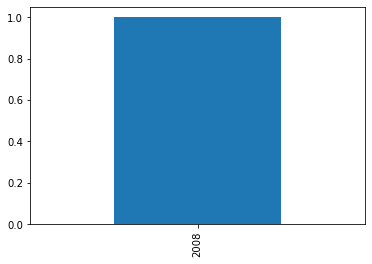

In [27]:
dataset['year'].value_counts(normalize=True).plot(kind="bar");


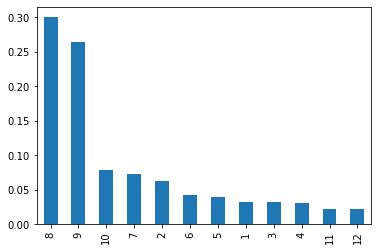

In [29]:
dataset['month'].value_counts(normalize=True).plot(kind="bar");

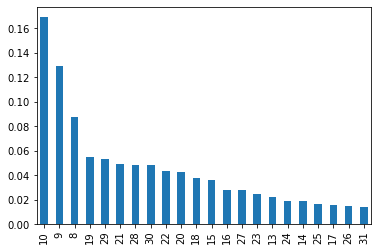

In [30]:
dataset['date'].value_counts(normalize=True).plot(kind="bar");

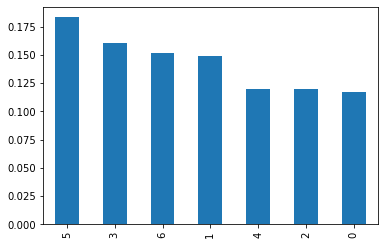

In [31]:
dataset['week_day'].value_counts(normalize=True).plot(kind="bar");

* The data is only for the year 2008.
* Most of the signals surged during the month of August (30%) and September (27%) and diped down to minimum during November and December.
* Between 8th- 10th of the month the signals are high with highest being on 10th.
* Signals are relatively lower on Sundays, Tuesdays and Thursdays and higher on the other days with maximum being on Fridays. (0 is Sunday, 6 is Saturday).

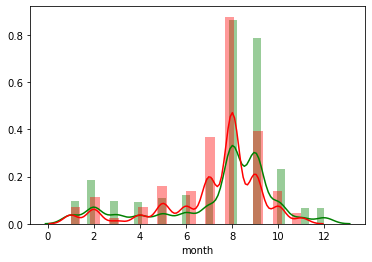

In [32]:
sns.distplot( dataset[dataset.Pass_Fail == -1]['month'], color = 'g');
sns.distplot( dataset[dataset.Pass_Fail == 1]['month'], color = 'r');

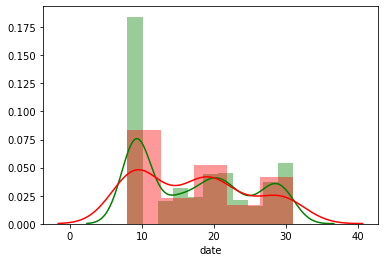

In [33]:
sns.distplot( dataset[dataset.Pass_Fail == -1]['date'], color = 'g');
sns.distplot( dataset[dataset.Pass_Fail == 1]['date'], color = 'r');

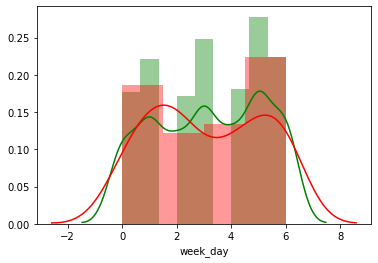

In [34]:
sns.distplot( dataset[dataset.Pass_Fail == -1]['week_day'], color = 'g');
sns.distplot( dataset[dataset.Pass_Fail == 1]['week_day'], color = 'r');

* Success is high during August and September, while failures are high between July - September.
* Success is more during beginning of month, failures tend to decrease by end of month.
* Failures happen mostly towards beginning and end of week.

Since we have many predcitors and we are not sure about their business values, we will not proceed with any further exploratory analysis on them.

## Data Pre-Processing

#### Segregate predictors vs target attributes

In [28]:
y = df2['Pass_Fail']
X = df1.copy()

print("shape of Predictors:", X.shape)
print("shape of Target:", y.shape)

shape of Predictors: (1567, 140)
shape of Target: (1567,)


#### Check Target Balancing

From our previous exploratory analysis we know that the target varaince is imbalanced with more than 90% as success (pass) and 10% as failures (fail).

We will fix this later when we apply target balancing techniques.

#### Test-Train Split

In [29]:
# 70:30 Test Train Split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42,)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1096, 140), (471, 140), (1096,), (471,))

In [30]:
print("Fail % in Train data    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Pass % in Train data    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == -1]), (len(y_train[y_train[:] == -1])/len(y_train)) * 100))
print("")
print("Fail % in Test data       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Pass % in Test data       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == -1]), (len(y_test[y_test[:] == -1])/len(y_test)) * 100))
print("")

Fail % in Train data    : 73 (6.66%)
Pass % in Train data    : 1023 (93.34%)

Fail % in Test data       : 31 (6.58%)
Pass % in Test data       : 440 (93.42%)



The distribution of the pass and fail in the two data-sets are same.

#### Scaling the data using z-scores

In [29]:
XtrScaled=X_train.apply(zscore)
XtsScaled=X_test.apply(zscore)

In [30]:
Xscaled = X.apply(zscore)

## Model Training, Testing and Tuning

#### Training Logistic Regression

In [45]:
# Logistic Regression

lr = LogisticRegression()

logreg=lr.fit(X_train, y_train)

pred = lr.predict(X_test)  # Predictions from logistic regression
score1 = lr.score(X_test, y_test)
score2 = lr.score(X_train, y_train)
print('Test accuracy score for Logistic Regression iteration1 :',score1)
print('Train accuracy score for Logistic Regression iteration1 :',score1)

Test accuracy score for Logistic Regression iteration1 : 0.9299363057324841
Train accuracy score for Logistic Regression iteration1 : 0.9299363057324841


#### Cross Validation

In [47]:
# k-fold cross validation without stratification

num_folds = 10
seed = 77

kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)

logreg_score2 = cross_val_score(logreg, X, y, cv = kfold).mean()
print(f'Cross validation score of Logistic Regression is = {logreg_score2}')

Cross validation score of Logistic Regression is = 0.9310713702433449


In [49]:
# Leave one out cross validation - we perform on X_train and y_train, else it may take too long

logreg_score3 = cross_val_score(logreg, X_train, y_train, cv=LeaveOneOut()).mean()
print(f'LOOCV score of Logistic Regression is = {logreg_score3}')

LOOCV score of Logistic Regression is = 0.9324817518248175


In [51]:
# Stratified Cross Validation

num_folds = 10
seed = 77

stratified_kfold = StratifiedKFold(n_splits = num_folds, random_state = seed, shuffle=True)

logreg_score3 = cross_val_score(logreg, X, y, cv = stratified_kfold).mean()
print(f'Stratified Cross validation score of Logistic Regression is = {logreg_score3}')

Stratified Cross validation score of Logistic Regression is = 0.9291768740813326


#### Hyper Parameter Tuning

In [54]:
# Grid search cv

parameters = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs','liblinear'],
}


logregG = GridSearchCV(LogisticRegression(), parameters, cv = 5, verbose = 2, n_jobs= 4)
logregG_model=logregG.fit(X_train, y_train)

logregG.best_params_


Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'penalty': 'l2', 'solver': 'lbfgs'}

In [55]:
# Randomized search cv

param_dist = {'C': [1.0, float], 
              'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
              'solver': ['newton-cg', 'lbfgs','liblinear']}

samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(LogisticRegression(), param_distributions=param_dist, n_iter=samples)

logregG_model=randomCV.fit(X_train, y_train)

 
print(randomCV.best_params_)

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 1.0}


The tuning parameters suggest that the default model which we have already fit is the best.

Before we do any ammendments in data we will fit all models on the scaled data. We choose scaled data because many techniques need the data to be scaled.

In [31]:
# Building all models

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))

#testing models
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=77,shuffle=True)
    cv_results = cross_val_score(model, XtrScaled, y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    out = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(out)

LR: 88.686405% (3.379891%)
KNN: 93.158465% (2.317564%)
GNB: 82.119266% (2.323347%)
SVM: 87.321101% (3.031986%)
DT: 88.055880% (3.699460%)
RF: 93.341952% (2.379017%)
AB: 91.972477% (2.143402%)
GBT: 93.068390% (2.044783%)


The accuracy scores are high. However, since this an imbalanced data we need to look into other metrices. For the given problem it is difficult to choose between recall and precision and hence choosing f1

In [32]:
# using k-fold cv and f1 score as the data being imbalanced accuracy may not be the best measure.

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))

#testing models
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=77,shuffle=True)
    cv_results = cross_val_score(model, XtrScaled, y_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    out = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(out)

LR: 8.413743% (13.461906%)
KNN: 4.722222% (9.464847%)
GNB: 21.370983% (11.556626%)
SVM: 11.573720% (11.881017%)
DT: 21.342785% (10.119632%)
RF: 0.000000% (0.000000%)
AB: 10.910256% (11.562717%)
GBT: 7.728938% (12.517025%)


In [33]:
# using stratified kfold cv and f1 score as the data being imbalanced accuracy may not be the best measure.

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=77,shuffle=True)
    cv_results = cross_val_score(model, XtrScaled, y_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    out = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(out)

LR: 16.406593% (18.591383%)
KNN: 4.722222% (9.464847%)
GNB: 23.203580% (8.846717%)
SVM: 15.492889% (15.745238%)
DT: 14.747653% (12.478931%)
RF: 0.000000% (0.000000%)
AB: 11.969697% (12.840704%)
GBT: 5.333333% (11.075498%)


The f1-scores are very low indicating the models are not good fit. We will try resample and dimension reduction techniques.

#### Over-Sampling

In [34]:
# Applying over sampling

over= RandomOverSampler(sampling_strategy=0.5, random_state=1)
X_over, y_over= over.fit_resample(XtrScaled, y_train)

In [35]:
# Checking the percentage after over-sampling

print("Fail % in over-sampled data   : {0} ({1:0.2f}%)".format(len(y_over[y_over[:] == 1]), (len(y_over[y_over[:] == 1])/len(y_over)) * 100))
print("Pass % in over-sampled data  : {0} ({1:0.2f}%)".format(len(y_over[y_over[:] == -1]), (len(y_over[y_over[:] == -1])/len(y_over)) * 100))

Fail % in over-sampled data   : 511 (33.31%)
Pass % in over-sampled data  : 1023 (66.69%)


In [36]:
# using k-fold cv and f1 score as the data being imbalanced accuracy may not be the best measure.

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))

#testing models
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=77,shuffle=True)
    cv_results = cross_val_score(model, X_over, y_over, cv=kfold,scoring='f1')
    results.append(cv_results)
    names.append(name)
    out = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(out)

LR: 79.755095% (5.401161%)
KNN: 85.568929% (3.747786%)
GNB: 65.663045% (2.666556%)
KNN: 85.568929% (3.747786%)
SVM: 82.588248% (3.910056%)
DT: 92.532574% (1.876075%)
RF: 100.000000% (0.000000%)
AB: 91.087258% (2.091788%)
GBT: 98.412955% (1.190066%)


#### SMOTE

In [37]:
# Applying SMOTE and checking percentage

smt = SMOTE(sampling_strategy=0.5, random_state=1)
X_SMOTE, y_SMOTE = smt.fit_resample(XtrScaled, y_train)

print("Fail % in SMOTE data  : {0} ({1:0.2f}%)".format(len(y_SMOTE[y_SMOTE[:] == 1]), (len(y_SMOTE[y_SMOTE[:] == 1])/len(y_SMOTE)) * 100))
print("Pass % in SMOTE data  : {0} ({1:0.2f}%)".format(len(y_SMOTE[y_SMOTE[:] == -1]), (len(y_SMOTE[y_SMOTE[:] == -1])/len(y_SMOTE)) * 100))

Fail % in SMOTE data  : 511 (33.31%)
Pass % in SMOTE data  : 1023 (66.69%)


In [38]:
# using k-fold cv and f1 score as the data being imbalanced accuracy may not be the best measure.

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))

#testing models
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=77,shuffle=True)
    cv_results = cross_val_score(model, X_SMOTE, y_SMOTE, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    out = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(out)

LR: 80.610533% (4.745168%)
KNN: 56.504671% (3.833414%)
GNB: 78.422112% (4.840126%)
SVM: 82.445742% (4.130082%)
DT: 81.152612% (6.170868%)
RF: 96.947327% (1.984222%)
AB: 84.975599% (3.855293%)
GBT: 94.052410% (2.896111%)


#### Under-Sampling

In [39]:
# Applying random under sampling and checking the percentage

under= RandomUnderSampler(sampling_strategy=0.5, random_state=1)
X_under, y_under= under.fit_resample(XtrScaled, y_train)

print("Fail % in Under-sampled data    : {0} ({1:0.2f}%)".format(len(y_under[y_under[:] == 1]), (len(y_under[y_under[:] == 1])/len(y_under)) * 100))
print("Pass % in Under-sampled data  : {0} ({1:0.2f}%)".format(len(y_under[y_under[:] == -1]), (len(y_under[y_under[:] == -1])/len(y_under)) * 100))

Fail % in Under-sampled data    : 73 (33.33%)
Pass % in Under-sampled data  : 146 (66.67%)


In [40]:
# using k-fold cv and f1 score as the data being imbalanced accuracy may not be the best measure.

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))

#testing models
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=77,shuffle=True)
    cv_results = cross_val_score(model, X_under, y_under, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    out = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(out)

LR: 47.565611% (12.651015%)
KNN: 32.934732% (15.428152%)
GNB: 55.112378% (13.200676%)
KNN: 32.934732% (15.428152%)
SVM: 45.108352% (12.784725%)
DT: 41.872355% (17.508380%)
RF: 19.944444% (14.473155%)
AB: 45.965750% (13.281964%)
GBT: 35.981907% (12.608651%)


#### PCA on Original Scaled data without any sampling

#### PCA on Over-Sampled data

In [44]:
# Applying PCA - using the over-sampled data we got in previous steps. The data is already scaled.

pca = PCA()
pca.fit(X_over)

# Chceking cumulative variance

var_cum = np.cumsum(pca.explained_variance_ratio_)*100

# Checking no of components explaining 95% of variation

k = np.argmax(var_cum>95)
print("Number of components explaining 95% variance: "+ str(k))

PCA()

Number of components explaining 95% variance: 106


In [45]:
# Applying 106 components

pca106 = PCA(n_components=106)
pca106.fit(X_over)
print(pca106.components_)
print(pca106.explained_variance_ratio_)
Xpca106 = pca106.transform(X_over)

PCA(n_components=106)

[[-0.10299387  0.03629158 -0.01086038 ... -0.05512394  0.0435946
   0.07445158]
 [-0.0148332   0.01190323  0.00415419 ...  0.01519891  0.04431328
   0.07923133]
 [-0.02323105  0.00732762 -0.03942953 ... -0.00753043  0.03653416
  -0.06792922]
 ...
 [ 0.01249107 -0.04971853  0.10094649 ...  0.02151641 -0.02556518
  -0.02311713]
 [ 0.030468    0.02471007  0.21664369 ...  0.06641439  0.03753415
  -0.01510139]
 [ 0.01828138  0.09509496 -0.02874533 ... -0.07330769  0.02767848
   0.08355965]]
[0.04870253 0.03192979 0.02990854 0.02840612 0.02290729 0.02238631
 0.02127211 0.02009376 0.01885203 0.01874329 0.01740248 0.01657405
 0.01588943 0.01561719 0.01456575 0.01442609 0.01405768 0.01376002
 0.01316544 0.01280841 0.01264657 0.01238997 0.01211627 0.01189045
 0.01179039 0.01155596 0.01105842 0.01092693 0.01033334 0.01028738
 0.01011747 0.00980506 0.00958788 0.00938346 0.00933842 0.00922856
 0.00887826 0.00879871 0.00851183 0.0083923  0.00827834 0.00810409
 0.00796862 0.00776444 0.00757657 0.0074

In [46]:
# using k-fold cv and f1 score as the data being imbalanced accuracy may not be the best measure.
# Applying on PCA over-sampled data

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))

#testing models
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=77,shuffle=True)
    cv_results = cross_val_score(model, Xpca106, y_over, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    out = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(out)

LR: 74.136461% (6.215730%)
KNN: 87.876395% (3.438879%)
GNB: 98.102706% (1.880109%)
SVM: 77.554146% (5.160318%)
DT: 94.344243% (1.971826%)
RF: 100.000000% (0.000000%)
AB: 98.053265% (1.535774%)
GBT: 100.000000% (0.000000%)


* The under-sampled data gives low f1-scores.
* From the over-sampled and SMOTE data we choose the following which had f1-score above 90%:
        * Over-sampled - Decision Tree, Random Forest, Gradient Boosting, AdaBoost
        * SMOTE - Random Forest, Gradient Boosting

#### Tuning on the Selected Models

* We will use tuning techniques on the train data.
* We will compare test and train accuracy scores to understand overfit issues.
* Check other measures.
* Apply tuning techniques (using randomised search) and finalise model based on f1-score.

In [53]:
# Decision Tree Over-sampling

param_test ={'criterion': ['gini','entropy'],
             'max_depth' : range(3,9),
             'min_samples_split': range(10, 36),
             'min_samples_leaf': range(10, 36),
            'max_features' : ['auto','sqrt','log2']}

samples = 100

dTree_OO = DecisionTreeClassifier(random_state=1)

dTree_OO_rs = RandomizedSearchCV(
    dTree_OO, param_distributions=param_test, n_iter=samples, 
    scoring='f1',
    cv=10,
    refit=True,
    random_state=1,
    verbose=True)

dTree_OO_rs.fit(X_over, y_over)
dTree_OO_rs.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(3, 9),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(10, 36),
                                        'min_samples_split': range(10, 36)},
                   random_state=1, scoring='f1', verbose=True)

{'min_samples_split': 29,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'gini'}

In [54]:
dTreeOO = DecisionTreeClassifier(min_samples_split=29,min_samples_leaf=10,max_features='sqrt',max_depth=8,criterion='gini',random_state=1)
model_dTreeOO = dTreeOO.fit(X_over, y_over)
train_dTreeOO_score = model_dTreeOO.score(X_over, y_over)
test_dTreeOO_score = model_dTreeOO.score(X_test, y_test)

print('Train accuracy is',train_dTreeOO_score)
print('Test accuracy is',test_dTreeOO_score)

Train accuracy is 0.909387222946545
Test accuracy is 0.19745222929936307


<Figure size 504x360 with 0 Axes>

              precision    recall  f1-score   support

          -1       0.90      0.16      0.27       440
           1       0.06      0.74      0.11        31

    accuracy                           0.20       471
   macro avg       0.48      0.45      0.19       471
weighted avg       0.84      0.20      0.26       471

accuracy= 0.19745222929936307
precison= 0.058524173027989825
recall= 0.7419354838709677
f1 score= 0.10849056603773584
ROC_AUC= 0.4505131964809384


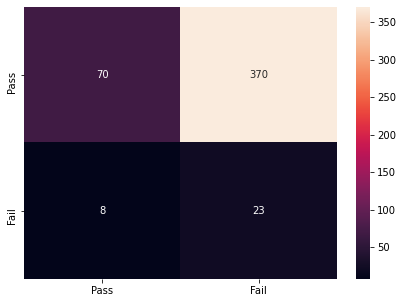

In [55]:
y_predict_dTreeOO = dTreeOO.predict(X_test)

cm1 = confusion_matrix(y_test, y_predict_dTreeOO, labels=[-1, 1])

df_cm1 = pd.DataFrame(cm1, index = [i for i in ["Pass","Fail"]],
                  columns = [i for i in ["Pass","Fail"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm1, annot=True ,fmt='g');

print(metrics.classification_report(y_test,y_predict_dTreeOO))
print('accuracy=',metrics.accuracy_score(y_test,y_predict_dTreeOO))
print('precison=',metrics.precision_score(y_test,y_predict_dTreeOO))
print('recall=',metrics.recall_score(y_test,y_predict_dTreeOO))
print('f1 score=',metrics.f1_score(y_test,y_predict_dTreeOO))
print('ROC_AUC=',metrics.roc_auc_score(y_test,y_predict_dTreeOO))

In [71]:
# Random Forest for Over Sampling

n_estimators = range(50,101)
max_features = ['auto', 'sqrt','log2']
max_depth = range(10,21)
min_samples_split = range(10, 100,5)
min_samples_leaf = range(10, 100,5)
bootstrap = [True, False]

# Create the random grid
param_test = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'criterion':['gini','entropy']}


samples = 50

RF_OO = RandomForestClassifier(random_state=1)

RF_OO_rs = RandomizedSearchCV(
    RF_OO, param_distributions=param_test, n_iter=samples, 
    scoring='f1',
    cv=5,
    refit=True,
    random_state=1,
    verbose=True)

RF_OO_rs.fit(X_over, y_over)
RF_OO_rs.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(10, 21),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(10, 100, 5),
                                        'min_samples_split': range(10, 100, 5),
                                        'n_estimators': range(50, 101)},
                   random_state=1, scoring='f1', verbose=True)

{'n_estimators': 88,
 'min_samples_split': 25,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 12,
 'criterion': 'gini',
 'bootstrap': True}

In [73]:
RFOO = RandomForestClassifier(n_estimators=88,min_samples_split=25,min_samples_leaf=10,max_features='auto',max_depth=12,criterion='gini',random_state=1,bootstrap=True)
model_RFOO = RFOO.fit(X_over, y_over)
train_RFOO_score = model_RFOO.score(X_over, y_over)
test_RFOO_score = model_RFOO.score(X_test, y_test)

print('Train accuracy is',train_RFOO_score)
print('Test accuracy is',test_RFOO_score)

Train accuracy is 0.9960886571056062
Test accuracy is 0.9341825902335457


<Figure size 504x360 with 0 Axes>

              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       440
           1       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471

accuracy= 0.9341825902335457
precison= 0.0
recall= 0.0
f1 score= 0.0
ROC_AUC= 0.5


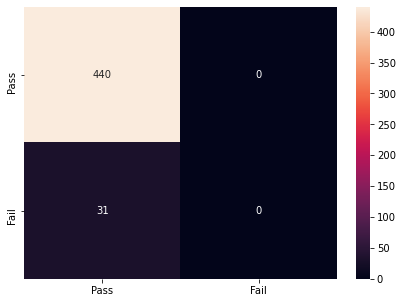

In [74]:
y_predict_RFOO = RFOO.predict(X_test)

cm2 = confusion_matrix(y_test, y_predict_RFOO, labels=[-1, 1])

df_cm2 = pd.DataFrame(cm2, index = [i for i in ["Pass","Fail"]],
                  columns = [i for i in ["Pass","Fail"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm2, annot=True ,fmt='g');

print(metrics.classification_report(y_test,y_predict_RFOO))
print('accuracy=',metrics.accuracy_score(y_test,y_predict_RFOO))
print('precison=',metrics.precision_score(y_test,y_predict_RFOO))
print('recall=',metrics.recall_score(y_test,y_predict_RFOO))
print('f1 score=',metrics.f1_score(y_test,y_predict_RFOO))
print('ROC_AUC=',metrics.roc_auc_score(y_test,y_predict_RFOO))

In [75]:
# Gradient Boosting for Over Sampling

loss = ['deviance','exponential']
n_estimators = range(50,101)
max_depth = range(10,21)
min_samples_split = range(10, 100,5)
min_samples_leaf = range(10, 100,5)
n_estimators = range(50,101)




# Create the random grid
param_test = {'n_estimators': n_estimators,
              'loss' : loss,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                'criterion':['friedman_mse','mse','mae']}


samples = 10

GB_OO = GradientBoostingClassifier(random_state=1)

GB_OO_rs = RandomizedSearchCV(
    GB_OO, param_distributions=param_test, n_iter=samples, 
    scoring='f1',
    cv=3,
    refit=True,
    random_state=1,
    verbose=True)

GB_OO_rs.fit(X_over, y_over)
GB_OO_rs.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': range(10, 21),
                                        'min_samples_leaf': range(10, 100, 5),
                                        'min_samples_split': range(10, 100, 5),
                                        'n_estimators': range(50, 101)},
                   random_state=1, scoring='f1', verbose=True)

{'n_estimators': 71,
 'min_samples_split': 60,
 'min_samples_leaf': 50,
 'max_depth': 10,
 'loss': 'deviance',
 'criterion': 'mse'}

In [76]:
GBOO = GradientBoostingClassifier(n_estimators=71,min_samples_split=60,min_samples_leaf=50,max_depth=10,criterion='mse',random_state=1,loss='deviance')
model_GBOO = GBOO.fit(X_over, y_over)
train_GBOO_score = model_GBOO.score(X_over, y_over)
test_GBOO_score = model_GBOO.score(X_test, y_test)

print('Train accuracy is',train_GBOO_score)
print('Test accuracy is',test_GBOO_score)

Train accuracy is 1.0
Test accuracy is 0.9341825902335457


<Figure size 504x360 with 0 Axes>

              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       440
           1       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471

accuracy= 0.9341825902335457
precison= 0.0
recall= 0.0
f1 score= 0.0
ROC_AUC= 0.5


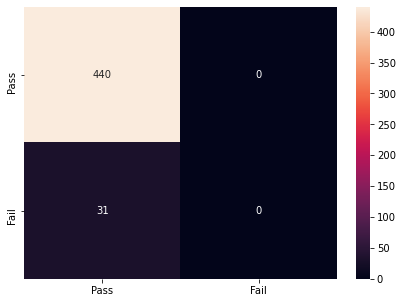

In [77]:
y_predict_GBOO = GBOO.predict(X_test)

cm3 = confusion_matrix(y_test, y_predict_GBOO, labels=[-1, 1])

df_cm3 = pd.DataFrame(cm3, index = [i for i in ["Pass","Fail"]],
                  columns = [i for i in ["Pass","Fail"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm3, annot=True ,fmt='g');

print(metrics.classification_report(y_test,y_predict_GBOO))
print('accuracy=',metrics.accuracy_score(y_test,y_predict_GBOO))
print('precison=',metrics.precision_score(y_test,y_predict_GBOO))
print('recall=',metrics.recall_score(y_test,y_predict_GBOO))
print('f1 score=',metrics.f1_score(y_test,y_predict_GBOO))
print('ROC_AUC=',metrics.roc_auc_score(y_test,y_predict_GBOO))

In [62]:
# Random Forest for Over Sampling

n_estimators = range(10,71)
max_features = ['auto', 'sqrt','log2']
max_depth = range(3,9)
min_samples_split = range(10, 36)
min_samples_leaf = range(10, 36)
bootstrap = [True, False]

# Create the random grid
param_test = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'criterion':['gini','entropy']}


samples = 50

RF_SM = RandomForestClassifier(random_state=1)

RF_SM_rs = RandomizedSearchCV(
    RF_SM, param_distributions=param_test, n_iter=samples, 
    scoring='f1',
    cv=5,
    refit=True,
    random_state=1,
    verbose=True)

RF_SM_rs.fit(X_SMOTE, y_SMOTE)
RF_SM_rs.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(3, 9),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(10, 36),
                                        'min_samples_split': range(10, 36),
                                        'n_estimators': range(10, 71)},
                   random_state=1, scoring='f1', verbose=True)

{'n_estimators': 43,
 'min_samples_split': 33,
 'min_samples_leaf': 16,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'gini',
 'bootstrap': False}

In [63]:
RFSM = RandomForestClassifier(n_estimators=43,min_samples_split=33,min_samples_leaf=16,max_features='sqrt',max_depth=8,criterion='gini',random_state=1,bootstrap=False)
model_RFSM = RFSM.fit(X_SMOTE, y_SMOTE)
train_RFSM_score = model_RFSM.score(X_SMOTE, y_SMOTE)
test_RFSM_score = model_RFSM.score(X_test, y_test)

print('Train accuracy is',train_RFSM_score)
print('Test accuracy is',test_RFSM_score)

Train accuracy is 0.9830508474576272
Test accuracy is 0.9341825902335457


<Figure size 504x360 with 0 Axes>

              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       440
           1       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471

accuracy= 0.9341825902335457
precison= 0.0
recall= 0.0
f1 score= 0.0
ROC_AUC= 0.5


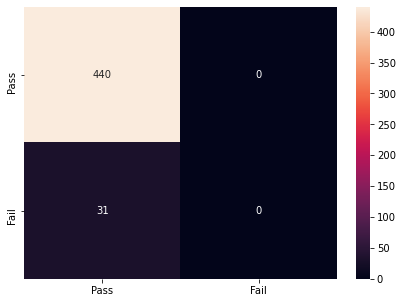

In [64]:
y_predict_RFSM = RFSM.predict(X_test)

cm4 = confusion_matrix(y_test, y_predict_RFSM, labels=[-1, 1])

df_cm4 = pd.DataFrame(cm4, index = [i for i in ["Pass","Fail"]],
                  columns = [i for i in ["Pass","Fail"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm4, annot=True ,fmt='g');

print(metrics.classification_report(y_test,y_predict_RFSM))
print('accuracy=',metrics.accuracy_score(y_test,y_predict_RFSM))
print('precison=',metrics.precision_score(y_test,y_predict_RFSM))
print('recall=',metrics.recall_score(y_test,y_predict_RFSM))
print('f1 score=',metrics.f1_score(y_test,y_predict_RFSM))
print('ROC_AUC=',metrics.roc_auc_score(y_test,y_predict_RFSM))

In [70]:
# Gradient Boosting for Smote Sampling

loss = ['deviance','exponential']
learning_rate=float
n_estimators = range(10,16)
max_depth = range(3,9)
min_samples_split = range(10, 16)
min_samples_leaf = range(10, 16)


# Create the random grid
param_test = {'n_estimators': n_estimators,
              'loss' : loss,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                'criterion':['friedman_mse','mse','mae']}


samples = 10

GB_SM = GradientBoostingClassifier(random_state=1)

GB_SM_rs = RandomizedSearchCV(
    GB_SM, param_distributions=param_test, n_iter=samples, 
    scoring='f1',
    cv=3,
    refit=True,
    random_state=1,
    verbose=True)

GB_SM_rs.fit(X_over, y_over)
GB_SM_rs.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': range(3, 9),
                                        'min_samples_leaf': range(10, 16),
                                        'min_samples_split': range(10, 16),
                                        'n_estimators': range(10, 16)},
                   random_state=1, scoring='f1', verbose=True)

{'n_estimators': 14,
 'min_samples_split': 12,
 'min_samples_leaf': 12,
 'max_depth': 8,
 'loss': 'exponential',
 'criterion': 'mse'}

In [65]:
GBSM = GradientBoostingClassifier(n_estimators=14,min_samples_split=12,min_samples_leaf=12,max_depth=8,criterion='mse',random_state=1,loss='exponential')
model_GBSM = GBSM.fit(X_SMOTE, y_SMOTE)
train_GBSM_score = model_GBSM.score(X_SMOTE, y_SMOTE)
test_GBSM_score = model_GBSM.score(X_test, y_test)

print('Train accuracy is',train_GBSM_score)
print('Test accuracy is',test_GBSM_score)

Train accuracy is 0.999348109517601
Test accuracy is 0.9341825902335457


<Figure size 504x360 with 0 Axes>

              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       440
           1       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471

accuracy= 0.9341825902335457
precison= 0.0
recall= 0.0
f1 score= 0.0
ROC_AUC= 0.5


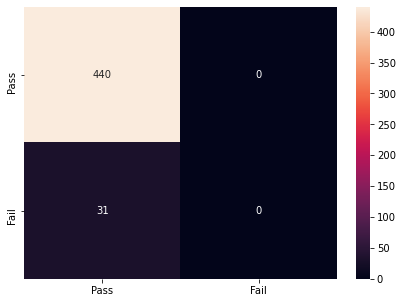

In [66]:
y_predict_GBSM = GBSM.predict(X_test)

cm5 = confusion_matrix(y_test, y_predict_GBSM, labels=[-1, 1])

df_cm5 = pd.DataFrame(cm5, index = [i for i in ["Pass","Fail"]],
                  columns = [i for i in ["Pass","Fail"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm5, annot=True ,fmt='g');

print(metrics.classification_report(y_test,y_predict_GBSM))
print('accuracy=',metrics.accuracy_score(y_test,y_predict_GBSM))
print('precison=',metrics.precision_score(y_test,y_predict_GBSM))
print('recall=',metrics.recall_score(y_test,y_predict_GBSM))
print('f1 score=',metrics.f1_score(y_test,y_predict_GBSM))
print('ROC_AUC=',metrics.roc_auc_score(y_test,y_predict_GBSM))

* We see that with application of different samping techniques only the pass class is getting predicted in the test data. This is because, in the test data is imbalanced. Hence, we will try with the original data once, though the f1-score for that was low. But we will check other metrices.
* Highest accuracy is with RF and hence we go by RF.

In [67]:
# Random Forest for Original Data

n_estimators = range(10,71)
max_features = ['auto', 'sqrt','log2']
max_depth = range(3,9)
min_samples_split = range(10, 36)
min_samples_leaf = range(10, 36)
bootstrap = [True, False]

# Create the random grid
param_test = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'criterion':['gini','entropy']}


samples = 50

RF = RandomForestClassifier(random_state=1)

RF_rs = RandomizedSearchCV(
    RF, param_distributions=param_test, n_iter=samples, 
    scoring='f1',
    cv=5,
    refit=True,
    random_state=1,
    verbose=True)

RF_rs.fit(X_train, y_train)
RF_rs.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(3, 9),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(10, 36),
                                        'min_samples_split': range(10, 36),
                                        'n_estimators': range(10, 71)},
                   random_state=1, scoring='f1', verbose=True)

{'n_estimators': 69,
 'min_samples_split': 28,
 'min_samples_leaf': 12,
 'max_features': 'auto',
 'max_depth': 4,
 'criterion': 'gini',
 'bootstrap': True}

In [68]:
RF = RandomForestClassifier(n_estimators=69,min_samples_split=28,min_samples_leaf=12,max_features='auto',max_depth=4,criterion='gini',random_state=1,bootstrap=True)
model_RF = RF.fit(X_train, y_train)
train_RF_score = model_RF.score(X_train, y_train)
test_RF_score = model_RF.score(X_test, y_test)

print('Train accuracy is',train_RF_score)
print('Test accuracy is',test_RF_score)

Train accuracy is 0.9333941605839416
Test accuracy is 0.9341825902335457


<Figure size 504x360 with 0 Axes>

              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       440
           1       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471

accuracy= 0.9341825902335457
precison= 0.0
recall= 0.0
f1 score= 0.0
ROC_AUC= 0.5


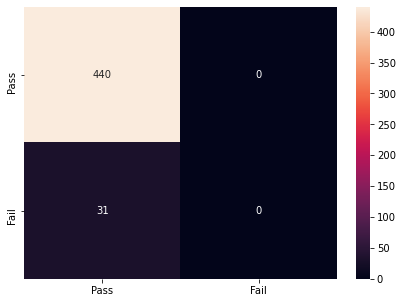

In [69]:
y_predict_RF = RF.predict(X_test)

cm6 = confusion_matrix(y_test, y_predict_RF, labels=[-1, 1])

df_cm6 = pd.DataFrame(cm6, index = [i for i in ["Pass","Fail"]],
                  columns = [i for i in ["Pass","Fail"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm6, annot=True ,fmt='g');

print(metrics.classification_report(y_test,y_predict_RF))
print('accuracy=',metrics.accuracy_score(y_test,y_predict_RF))
print('precison=',metrics.precision_score(y_test,y_predict_RF))
print('recall=',metrics.recall_score(y_test,y_predict_RF))
print('f1 score=',metrics.f1_score(y_test,y_predict_RF))
print('ROC_AUC=',metrics.roc_auc_score(y_test,y_predict_RF))

In [104]:
data = {'Technique' : ['Decision Tree - Over Sample', "Random Forest - Over Sample", 'Gradient Boosting - Over Sample',
                       'Random Forest - SMOTE', 'Gradient Boosting - SMOTE'],
       'Train Accuracy' : [train_dTreeOO_score, train_RFOO_score, train_GBOO_score, train_RFSM_score, train_GBSM_score],
       'Test Accuracy' : [test_dTreeOO_score, test_RFOO_score, test_GBOO_score, test_RFSM_score, test_GBSM_score]}

result = pd.DataFrame(data)

In [105]:
result

,Technique,Train Accuracy,Test Accuracy
0,Decision Tree - Over Sample,0.909387,0.197452
1,Random Forest - Over Sample,0.996089,0.934183
2,Gradient Boosting - Over Sample,1.000000,0.934183
3,Random Forest - SMOTE,0.983051,0.934183
4,Gradient Boosting - SMOTE,0.999348,0.934183


In [107]:
# Applying PCA

pca = PCA()
pca.fit(Xscaled)

# Chceking cumulative variance

var_cum = np.cumsum(pca.explained_variance_ratio_)*100

# Checking no of components explaining 95% of variation

k = np.argmax(var_cum>95)
print("Number of components explaining 95% variance: "+ str(k))

PCA()

Number of components explaining 95% variance: 110


In [108]:
# Applying 110 components

pca110 = PCA(n_components=110)
pca110.fit(Xscaled)
print(pca110.components_)
print(pca110.explained_variance_ratio_)
Xpca1 = pca110.transform(Xscaled)

PCA(n_components=110)

[[-0.04349992  0.00218091 -0.00718162 ... -0.04800975  0.01565721
   0.03999076]
 [ 0.00518018 -0.01336098 -0.0321094  ... -0.00378088  0.00957962
   0.01749934]
 [-0.02808261 -0.00691576  0.06470767 ...  0.00711013  0.05818525
   0.10922103]
 ...
 [-0.06307473 -0.08047036 -0.02801185 ...  0.02701701 -0.03088666
   0.07765894]
 [ 0.07425965  0.00834982 -0.15165631 ...  0.07871554 -0.0202923
   0.01995629]
 [-0.0690706   0.03652314 -0.00651874 ... -0.03389077  0.01348251
   0.00270636]]
[0.04615362 0.0296248  0.02657561 0.02419794 0.02035427 0.01986165
 0.01788832 0.01716929 0.01579678 0.0153817  0.01504588 0.01477628
 0.01468082 0.01383111 0.01331582 0.01323706 0.0125887  0.0121462
 0.01196655 0.01179924 0.01170459 0.01162327 0.01127369 0.01080699
 0.01044616 0.0103057  0.01011444 0.01008059 0.00978655 0.00955258
 0.00948715 0.0092005  0.00917015 0.00900344 0.00897349 0.00878736
 0.00868292 0.00855482 0.00846512 0.00841182 0.00829203 0.0081736
 0.00807003 0.00792083 0.00781677 0.007784

In [109]:
# splitting data training dataset into train and test set for independent attributes
X_trainpc, X_testpc, y_trainpc, y_testpc =train_test_split(Xpca1,y, test_size=.30,random_state=42,stratify=y)

In [111]:
# Decision Tree on PC data

param_test ={'criterion': ['gini','entropy'],
             'max_depth' : range(3,9),
             'min_samples_split': range(10, 36),
             'min_samples_leaf': range(10, 36),
            'max_features' : ['auto','sqrt','log2']}

samples = 100

dTree_PCOO = DecisionTreeClassifier(random_state=1)

dTree_PCOO_rs = RandomizedSearchCV(
    dTree_PCOO, param_distributions=param_test, n_iter=samples, 
    scoring='f1',
    cv=10,
    refit=True,
    random_state=1,
    verbose=True)

dTree_OO_rs.fit(X_trainpc, y_trainpc)
dTree_OO_rs.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(3, 9),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(10, 36),
                                        'min_samples_split': range(10, 36)},
                   random_state=1, scoring='f1', verbose=True)

{'min_samples_split': 14,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 3,
 'criterion': 'entropy'}

In [112]:
dTreePCOO = DecisionTreeClassifier(min_samples_split=14,min_samples_leaf=10,max_features='auto',max_depth=3,criterion='entropy',random_state=1)
model_dTreePCOO = dTreePCOO.fit(X_trainpc, y_trainpc)
train_dTreePCOO_score = model_dTreePCOO.score(X_trainpc, y_trainpc)
test_dTreePCOO_score = model_dTreePCOO.score(X_testpc, y_testpc)

print('Train accuracy is',train_dTreePCOO_score)
print('Test accuracy is',test_dTreePCOO_score)

Train accuracy is 0.9352189781021898
Test accuracy is 0.9320594479830149


<Figure size 504x360 with 0 Axes>

              precision    recall  f1-score   support

          -1       0.94      1.00      0.96       440
           1       0.33      0.03      0.06        31

    accuracy                           0.93       471
   macro avg       0.63      0.51      0.51       471
weighted avg       0.90      0.93      0.91       471

accuracy= 0.9320594479830149
precison= 0.3333333333333333
recall= 0.03225806451612903
f1 score= 0.0588235294117647
ROC_AUC= 0.5138563049853373


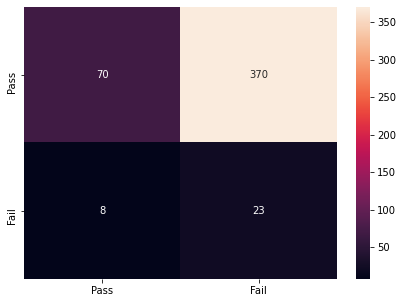

In [113]:
y_predict_dTreePCOO = dTreePCOO.predict(X_testpc)

pccm1 = confusion_matrix(y_testpc, y_predict_dTreePCOO, labels=[-1, 1])

pcdf_cm1 = pd.DataFrame(cm1, index = [i for i in ["Pass","Fail"]],
                  columns = [i for i in ["Pass","Fail"]])
plt.figure(figsize = (7,5))
sns.heatmap(pcdf_cm1, annot=True ,fmt='g');

print(metrics.classification_report(y_testpc,y_predict_dTreePCOO))
print('accuracy=',metrics.accuracy_score(y_testpc,y_predict_dTreePCOO))
print('precison=',metrics.precision_score(y_testpc,y_predict_dTreePCOO))
print('recall=',metrics.recall_score(y_testpc,y_predict_dTreePCOO))
print('f1 score=',metrics.f1_score(y_testpc,y_predict_dTreePCOO))
print('ROC_AUC=',metrics.roc_auc_score(y_testpc,y_predict_dTreePCOO))

In [114]:
# Random Forest for PCA

n_estimators = range(10,71)
max_features = ['auto', 'sqrt','log2']
max_depth = range(3,9)
min_samples_split = range(10, 36)
min_samples_leaf = range(10, 36)
bootstrap = [True, False]

# Create the random grid
param_test = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'criterion':['gini','entropy']}


samples = 50

RF_SM = RandomForestClassifier(random_state=1)

RF_SM_rs = RandomizedSearchCV(
    RF_SM, param_distributions=param_test, n_iter=samples, 
    scoring='f1',
    cv=5,
    refit=True,
    random_state=1,
    verbose=True)

RF_SM_rs.fit(X_trainpc, y_trainpc)
RF_SM_rs.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(3, 9),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(10, 36),
                                        'min_samples_split': range(10, 36),
                                        'n_estimators': range(10, 71)},
                   random_state=1, scoring='f1', verbose=True)

{'n_estimators': 69,
 'min_samples_split': 28,
 'min_samples_leaf': 12,
 'max_features': 'auto',
 'max_depth': 4,
 'criterion': 'gini',
 'bootstrap': True}

In [115]:
RF = RandomForestClassifier(n_estimators=69,min_samples_split=28,min_samples_leaf=12,max_features='auto',max_depth=4,criterion='gini',random_state=1,bootstrap=True)
model_RF = RF.fit(X_trainpc, y_trainpc)
train_RF_score = model_RF.score(X_trainpc, y_trainpc)
test_RF_score = model_RF.score(X_testpc, y_testpc)

print('Train accuracy is',train_RF_score)
print('Test accuracy is',test_RF_score)

Train accuracy is 0.9333941605839416
Test accuracy is 0.9341825902335457


<Figure size 504x360 with 0 Axes>

              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       440
           1       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471

accuracy= 0.9341825902335457
precison= 0.0
recall= 0.0
f1 score= 0.0
ROC_AUC= 0.5


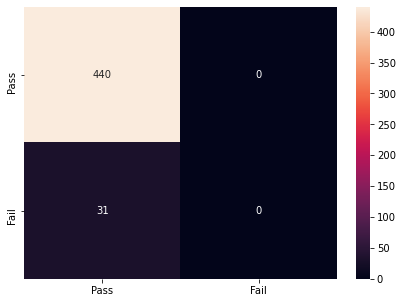

In [116]:
y_predict_RF = RF.predict(X_testpc)

cm6 = confusion_matrix(y_testpc, y_predict_RF, labels=[-1, 1])

df_cm6 = pd.DataFrame(cm6, index = [i for i in ["Pass","Fail"]],
                  columns = [i for i in ["Pass","Fail"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm6, annot=True ,fmt='g');

print(metrics.classification_report(y_testpc,y_predict_RF))
print('accuracy=',metrics.accuracy_score(y_testpc,y_predict_RF))
print('precison=',metrics.precision_score(y_testpc,y_predict_RF))
print('recall=',metrics.recall_score(y_testpc,y_predict_RF))
print('f1 score=',metrics.f1_score(y_testpc,y_predict_RF))
print('ROC_AUC=',metrics.roc_auc_score(y_testpc,y_predict_RF))

* We go with PCA Decision Tree.

In [117]:
# Save the Modle to file in the current working directory


Pkl_Filename = "Pickle_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model_dTreePCOO, file)
    
    
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    pickled_model = pickle.load(file)

pickled_model


DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='auto',
                       min_samples_leaf=10, min_samples_split=14,
                       random_state=1)

#### Trying with different sample

In [118]:
# splitting data training dataset into train and test set for independent attributes (changing random state)
X_trainpc, X_testpc, y_trainpc, y_testpc =train_test_split(Xpca1,y, test_size=.30,random_state=102,stratify=y)

In [119]:
# Decision Tree on PC data

param_test ={'criterion': ['gini','entropy'],
             'max_depth' : range(3,9),
             'min_samples_split': range(10, 36),
             'min_samples_leaf': range(10, 36),
            'max_features' : ['auto','sqrt','log2']}

samples = 100

dTree_PCOO = DecisionTreeClassifier(random_state=1)

dTree_PCOO_rs = RandomizedSearchCV(
    dTree_PCOO, param_distributions=param_test, n_iter=samples, 
    scoring='f1',
    cv=10,
    refit=True,
    random_state=1,
    verbose=True)

dTree_OO_rs.fit(X_trainpc, y_trainpc)
dTree_OO_rs.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(3, 9),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(10, 36),
                                        'min_samples_split': range(10, 36)},
                   random_state=1, scoring='f1', verbose=True)

{'min_samples_split': 20,
 'min_samples_leaf': 13,
 'max_features': 'log2',
 'max_depth': 7,
 'criterion': 'gini'}

In [120]:
dTreePCOO = DecisionTreeClassifier(min_samples_split=20,min_samples_leaf=13,max_features='log2',max_depth=7,criterion='gini',random_state=1)
model_dTreePCOO = dTreePCOO.fit(X_trainpc, y_trainpc)
train_dTreePCOO_score = model_dTreePCOO.score(X_trainpc, y_trainpc)
test_dTreePCOO_score = model_dTreePCOO.score(X_testpc, y_testpc)

print('Train accuracy is',train_dTreePCOO_score)
print('Test accuracy is',test_dTreePCOO_score)

Train accuracy is 0.9370437956204379
Test accuracy is 0.9278131634819533


* Previous Train Accuracy is 0.933 and current is 0.937
* Previous Test Accuracy is 0.932 and current is 0.927
* Both the above are different but the difference does not seem to be significant.
* We can also apply cross validation and get the mean score for both the samples and test the significance of difference using t-test.

## Import Future data

In [127]:
pred_df = pd.read_excel('Future_predictions.xlsx')

pred_df.head()

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1,624.3145,218.3174,0,4.592,4.841,2834,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1,608.1700,84.0793,NaN,NaN,0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,NaN,NaN,NaN,NaN,0.9460,0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123,111.3,75.2,46.2000,350.6710,0.3948,0,6.78,0.0034,0.0898,0.0850,0.0358,0.0328,12.2566,0,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,NaN,NaN,1017,967,1066,368,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,0,0,20.95,0.333,12.49,16.713,0.0803,5.72,0,11.19,65.363,0,0,0,0,0,0,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.040,16.230,0.2951,8.64,0,10.30,97.314,0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.0010,NaN,0.0707,0.0211,175.2173,0.0315,1940.3994,0,0.0744,0.0546,0,0,0,0,0,0,0,0,0,0.0027,0.0040,0,0,0,0,NaN,NaN,NaN,NaN,0.0188,0,219.9453,0.0011,2.8374,0.0189,0.0050,0.4269,0,0,0,0,0,0,0,0,0,0,0,0.0472,40.855,4.5152,30.9815,33.9606,22.9057,15.9525,110.2144,0.1310,0,2.5883,0.0010,0.0319,0.01